In [1]:
import pandas as pd

import geopandas as gpd

import geopy
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon 

%matplotlib inline

In [21]:
tab2 = pd.read_csv('../language_data/amano_tab2.csv')

In [22]:
tab3 = pd.read_csv('../language_data/amano_tab3.csv')

In [23]:
tab4 = pd.read_csv('../language_data/amano_tab4.csv')

In [24]:
unesco = pd.read_csv('../02_data/04_language_data/unesco_atlas_languages_limited_dataset.csv')

In [84]:
wals = pd.read_csv('../02_data/04_language_data/wals_full_language.csv')

In [85]:
endangered = pd.read_csv('../02_data/04_language_data/endangered_languages.csv')

In [86]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [28]:
guardian = pd.read_csv('../language_data/extinct_languages_extended_dataset_guardian.csv')
guardian.drop(columns=['Name in French','Name in Spanish', 'Name in the language'], inplace=True)

In [29]:
guardian_geo = gpd.read_file('../language_data/extinct_languages_extended_dataset_guardian.csv')
guardian_geo.drop(columns=['Name in French','Name in Spanish', 'Name in the language'], inplace=True)

In [88]:
guardian['iso_code'] = guardian['iso_code'].str[:3]

In [90]:
guardian

,name,country_co,iso_code,vulnerabil,speakers,latitude,longitude,country,continent,geometry
0,South Italian,ITA,nap,Vulnerable,7500000.0,40.9798,15.2490,Italy,Europe,POINT (15.249 40.9798)
1,Sicilian,ITA,scn,Vulnerable,5000000.0,37.4399,14.5019,Italy,Europe,POINT (14.5019 37.4399)
2,Low Saxon,DEU,act,Vulnerable,4800000.0,53.4029,10.3601,Germany,Europe,POINT (10.3601 53.4029)
3,Belarusian,BRB,bel,Vulnerable,4000000.0,53.9560,27.5756,Belarus,Europe,POINT (27.5756 53.956)
4,Lombard,ITA,lmo,Definitely endangered,3500000.0,45.7215,9.3273,Italy,Europe,POINT (9.327299999999999 45.7215)
5,Romani,ALB,rmc,Definitely endangered,3500000.0,46.3165,22.3681,Romania,Europe,POINT (22.3681 46.3165)
6,Yiddish (Israel),ISR,ydd,Definitely endangered,3000000.0,32.0833,34.8333,Israel,Asia,POINT (34.8333 32.0833)
7,Gondi,IND,gon,Vulnerable,2713790.0,19.5804,80.4418,India,Asia,POINT (80.4418 19.5804)
8,Limburgian-Ripuarian,DEU,ksh,Vulnerable,2600000.0,50.7781,6.0864,Belgium,Europe,POINT (6.0864 50.7781)
9,Quechua of Southern Bolivia,BOL,quh,Vulnerable,2300000.0,-18.0675,-65.7641,Bolivia,South America,POINT (-65.7641 -18.0675)


In [91]:
wals.head(3)

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
0,aab,NaN,NaN,Arapesh (Abu),-3.45,142.950000,Kombio-Arapesh,Torricelli,NaN,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aar,aiw,aari1239,Aari,6.00,36.583333,South Omotic,Afro-Asiatic,Africa,ET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aba,aau,abau1245,Abau,-4.00,141.250000,Upper Sepik,Sepik,Papunesia,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
wals_with_guardian = wals.merge(guardian.dropna(), on='iso_code')

In [96]:
guardian.shape

(2722, 10)

In [97]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [29]:
guardian = gpd.read_file('../language_data/guardian_language_shp/')

In [30]:
guardian['Country'] = 0

In [32]:
for i in guardian.index:
    for j in world.index:
        if world['geometry'][j].contains(guardian['geometry'][i]):
            guardian['Country'][i] = world['name'][j]
        else:
            pass

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
guardian.to_file('../language_data/guardian_version2.shp')

In [24]:
guardian.shape

(2722, 13)

In [25]:
guardian.isnull().sum()

ID                                0
Name in English                   0
Countries                         1
Country codes alpha 3             1
ISO639-3 codes                  264
Degree of endangerment            0
Alternate names                1139
Name in the language           2695
Number of speakers              183
Sources                         643
Latitude                          3
Longitude                         3
Description of the location     852
dtype: int64

In [38]:
unesco.shape

(2724, 6)

In [46]:
wals.shape

(2679, 202)

In [35]:
[i for i in wals.columns]

['wals_code',
 'iso_code',
 'glottocode',
 'Name',
 'latitude',
 'longitude',
 'genus',
 'family',
 'macroarea',
 'countrycodes',
 '1A Consonant Inventories',
 '2A Vowel Quality Inventories',
 '3A Consonant-Vowel Ratio',
 '4A Voicing in Plosives and Fricatives',
 '5A Voicing and Gaps in Plosive Systems',
 '6A Uvular Consonants',
 '7A Glottalized Consonants',
 '8A Lateral Consonants',
 '9A The Velar Nasal',
 '10A Vowel Nasalization',
 '11A Front Rounded Vowels',
 '12A Syllable Structure',
 '13A Tone',
 '14A Fixed Stress Locations',
 '15A Weight-Sensitive Stress',
 '16A Weight Factors in Weight-Sensitive Stress Systems',
 '17A Rhythm Types',
 '18A Absence of Common Consonants',
 '19A Presence of Uncommon Consonants',
 '20A Fusion of Selected Inflectional Formatives',
 '21A Exponence of Selected Inflectional Formatives',
 '22A Inflectional Synthesis of the Verb',
 '23A Locus of Marking in the Clause',
 '24A Locus of Marking in Possessive Noun Phrases',
 '25A Locus of Marking: Whole-langua

In [53]:
unesco.isnull().sum()

ID                          0
Name in English             0
Countries                   1
Country codes alpha 3       1
ISO639-3 codes            266
Degree of endangerment      0
dtype: int64

In [107]:
unesco.rename(columns={'ISO639-3 codes':'Language ISO'}, inplace=True)

In [113]:
tab34.isnull().sum()

Language ISO                  1
Initial population size    5702
Last population size       5702
Growth rates               6128
Range size                  418
Population size             208
dtype: int64

In [115]:
unesco.isnull().sum()

ID                          0
Name in English             0
Countries                   1
Country codes alpha 3       1
Language ISO              266
Degree of endangerment      0
dtype: int64

In [112]:
pd.merge(unesco,tab34,how='inner')

,ID,Name in English,Countries,Country codes alpha 3,Language ISO,Degree of endangerment,Initial population size,Last population size,Growth rates,Range size,Population size
0,78,'Ongota,Ethiopia,ETH,bxe,Critically endangered,NaN,NaN,NaN,11.103672,8.0
1,1882,A'ingae / Cofan (Colombia),Colombia,COL,con,Severely endangered,500.0,1700.0,1.029247,3911.826575,1700.0
2,1835,A'ingae / Cofan (Ecuador),Ecuador,ECU,con,Definitely endangered,500.0,1700.0,1.029247,3911.826575,1700.0
3,1177,A'tong,India,IND,aot,Severely endangered,NaN,NaN,NaN,456.004862,5400.0
4,116,Aasax,United Republic of Tanzania,TZA,aas,Extinct,NaN,NaN,NaN,812.681744,350.0
5,2655,Abaga,Papua New Guinea,PNG,abg,Critically endangered,NaN,NaN,NaN,78.752400,5.0
6,2264,Abai Sungai,Malaysia,MYS,abf,Definitely endangered,NaN,NaN,NaN,54.797499,500.0
7,1077,Abaza,"Russian Federation, Turkey","RUS, TUR",abq,Definitely endangered,NaN,NaN,NaN,1274.019718,38200.0
8,1076,Abkhaz,"Georgia, Russian Federation, Turkey","GEO, RUS, TUR",abk,Vulnerable,NaN,NaN,NaN,4491.320119,105000.0
9,1270,Acatepec Mazatec,Mexico,MEX,NaN,Vulnerable,15000000.0,47265100.0,1.025645,83308.797090,40700000.0


In [41]:
wals.shape

(2000, 14)

In [14]:
tab1.head(20)

,X,Y,LandArea,TotalLanguageRichness,ThreatenedLanguageRichness,ExtinctLanguageRichness,ProportionThreatened,ProportionExtinct
0,-17271041.97,7236470.1,NaN,0,0,0,NaN,NaN
1,-17078069.44,7236470.1,NaN,0,0,0,NaN,NaN
2,-16885096.90,7236470.1,NaN,0,0,0,NaN,NaN
3,-16692124.36,7236470.1,NaN,0,0,0,NaN,NaN
4,-16499151.83,7236470.1,NaN,0,0,0,NaN,NaN
5,-16306179.29,7236470.1,NaN,0,0,0,NaN,NaN
6,-16113206.76,7236470.1,NaN,0,0,0,NaN,NaN
7,-15920234.22,7236470.1,NaN,0,0,0,NaN,NaN
8,-15727261.68,7236470.1,NaN,0,0,0,NaN,NaN
9,-15534289.15,7236470.1,NaN,0,0,0,NaN,NaN


In [9]:
tab1.isnull().sum()

X                                0
Y                                0
LandArea                      8058
TotalLanguageRichness            0
ThreatenedLanguageRichness       0
ExtinctLanguageRichness          0
ProportionThreatened          9006
ProportionExtinct             9006
dtype: int64

In [10]:
tab1.shape

(13680, 8)

In [8]:
tab2.head()

,Longitude,Latitude,X,Y,MedianRangeSize,MedianPopulationSize,MedianGrowthRate,AMT,AP,TS,...,VegetationProductivity,ElevationRange,HabitatDiversity,MeanPopulationDensity,PopulationChange,GDPpercapita,LanguageRichness,No.LanguagesWithGrowthEstimates,LandArea,LandAreaBand
0,-179,81.855797,-17271041.97,7236470.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1080453.875
1,-177,81.855797,-17078069.44,7236470.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1080453.875
2,-175,81.855797,-16885096.90,7236470.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1080453.875
3,-173,81.855797,-16692124.36,7236470.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1080453.875
4,-171,81.855797,-16499151.83,7236470.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1080453.875


In [11]:
tab2.shape

(13680, 21)

In [12]:
tab2.isnull().sum()

Longitude                              0
Latitude                               0
X                                      0
Y                                      0
MedianRangeSize                     9006
MedianPopulationSize                9006
MedianGrowthRate                   11432
AMT                                 8617
AP                                  8581
TS                                  8617
PS                                  8581
VegetationProductivity              8617
ElevationRange                      8581
HabitatDiversity                    8581
MeanPopulationDensity               8700
PopulationChange                    8602
GDPpercapita                        8636
LanguageRichness                       0
No.LanguagesWithGrowthEstimates     9006
LandArea                            8058
LandAreaBand                           0
dtype: int64

In [9]:
tab3.head()

,Language ISO,Initial population size,Last population size,Growth rates,Range size
0,aaa,9000,9000,NaN,236.372739
1,aar,50000,1078200,1.042475,133875.794300
2,abm,3850,12500,NaN,165.947457
3,abr,791200,1182000,1.027596,14625.369870
4,abt,33000,44000,NaN,1140.817591


In [16]:
tab3.shape

(1075, 5)

In [10]:
tab4.head()

,Language ISO,Population size,Range size
0,aaa,9000.0,236.372739
1,aab,7000.0,39.495792
2,aac,50.0,1102.255128
3,aad,830.0,63.460643
4,aae,80000.0,591.833327


In [17]:
tab4.shape

(6708, 3)

In [25]:
print(tab1.shape,
tab2.shape,
tab3.shape,
tab4.shape)

(13680, 8) (13680, 21) (1075, 5) (6708, 3)


In [30]:
tab12 = pd.merge(tab1, tab2, how='outer')

In [32]:
tab12.head()

,X,Y,LandArea,TotalLanguageRichness,ThreatenedLanguageRichness,ExtinctLanguageRichness,ProportionThreatened,ProportionExtinct,Longitude,Latitude,...,PS,VegetationProductivity,ElevationRange,HabitatDiversity,MeanPopulationDensity,PopulationChange,GDPpercapita,LanguageRichness,No.LanguagesWithGrowthEstimates,LandAreaBand
0,-17271041.97,7236470.1,NaN,0,0,0,NaN,NaN,-179,81.855797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1080453.875
1,-17078069.44,7236470.1,NaN,0,0,0,NaN,NaN,-177,81.855797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1080453.875
2,-16885096.90,7236470.1,NaN,0,0,0,NaN,NaN,-175,81.855797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1080453.875
3,-16692124.36,7236470.1,NaN,0,0,0,NaN,NaN,-173,81.855797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1080453.875
4,-16499151.83,7236470.1,NaN,0,0,0,NaN,NaN,-171,81.855797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1080453.875


In [109]:
tab34 = pd.merge(tab3, tab4, how='outer')

In [23]:
tab34.head()

,Language ISO,Initial population size,Last population size,Growth rates,Range size,Population size
0,aaa,9000.0,9000.0,NaN,236.372739,9000.0
1,aar,50000.0,1078200.0,1.042475,133875.794300,1078200.0
2,abm,3850.0,12500.0,NaN,165.947457,12500.0
3,abr,791200.0,1182000.0,1.027596,14625.369870,1182000.0
4,abt,33000.0,44000.0,NaN,1140.817591,44000.0


In [27]:
tab12.isnull().sum()

X                                      0
Y                                      0
LandArea                            8058
TotalLanguageRichness                  0
ThreatenedLanguageRichness             0
ExtinctLanguageRichness                0
ProportionThreatened                9006
ProportionExtinct                   9006
Longitude                              0
Latitude                               0
MedianRangeSize                     9006
MedianPopulationSize                9006
MedianGrowthRate                   11432
AMT                                 8617
AP                                  8581
TS                                  8617
PS                                  8581
VegetationProductivity              8617
ElevationRange                      8581
HabitatDiversity                    8581
MeanPopulationDensity               8700
PopulationChange                    8602
GDPpercapita                        8636
LanguageRichness                       0
No.LanguagesWith

In [28]:
tab34.isnull().sum()

Language ISO                  1
Initial population size    5702
Last population size       5702
Growth rates               6128
Range size                  418
Population size             208
dtype: int64

In [ ]:
tab12.reindex(labels=tab12.)

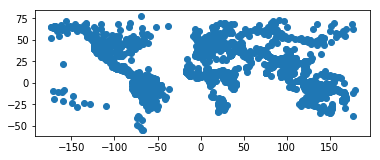

In [81]:
guardian.plot()

In [82]:
guardian.to_file('../language_data/guardian_lang_shape.shp')

In [84]:
endangered.head()

,number,SIL,name,alt_names,status,speakers,family,related,notes,notes_2,country,region,coord
0,3645,knw,!Xun,Ju; !Xun (Ekoka); Kung-Ekoka; !Kung; Ekoka-!Xû...,"Vulnerable (20 percent certain, based on the e...","14,000-18,000",Kx'a,"Southeastern !Xun, Northwestern !Xun, Central ...",NaN,NaN,South Africa;Namibia;Angola;,Africa,"-28.74358,23.983154; -17.560247, 18.050537; -1..."
1,3956,bpk,Ôrôê,Orowe; Boewe; Neukaledonien;,"Endangered (20 percent certain, based on the e...",590,Austronesian; Malayo-Polynesian; Oceanic; New ...,NaN,NaN,NaN,New Caledonia;,Pacific,"-21.4223,165.4678"
2,1933,taa,(Lower) Tanana,NaN,"Critically Endangered (80 percent certain, bas...",25,Athabaskan-Eyak-Tlingit; Dene (Athabaskan),Minto-Nenana; Salcha; Chena,NaN,Tanana is the language of the Lower Tanana riv...,USA;,North America,"65.157778, -149.37;64.521111, -146.980556;64.5..."
3,3581,aas,Aasáx,"Asax; Asá; Aasá; Assa; Asak; ""Ndorobo""; ""Dorob...",Dormant,0,Afro-Asiatic; Cushitic; South Cushitic,NaN,NaN,NaN,Tanzania;,Africa,"-5.1948,37.738"
4,2011,abg,Abaga,NaN,"Critically Endangered (20 percent certain, bas...",5,Trans-New Guinea; Kainantu-Goroka,NaN,NaN,NaN,Papua New Guinea;,Pacific,"-6.1883,145.5976"


In [10]:
endangered.shape

(3423, 13)

In [11]:
endangered['status'].value_counts()

Threatened (20 percent certain, based on the evidence available)                680
Endangered (20 percent certain, based on the evidence available)                552
Vulnerable (20 percent certain, based on the evidence available)                354
Severely Endangered (20 percent certain, based on the evidence available)       206
Dormant ()                                                                      183
Critically Endangered (20 percent certain, based on the evidence available)     164
Critically Endangered (80 percent certain, based on the evidence available)     110
Critically Endangered (100 percent certain, based on the evidence available)     93
At risk (20 percent certain, based on the evidence available)                    85
Endangered (40 percent certain, based on the evidence available)                 73
Vulnerable (100 percent certain, based on the evidence available)                72
Awakening ()                                                                

In [12]:
unesco.shape

(2724, 6)

In [13]:
unesco.head()

,ID,Name in English,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment
0,1444,!Gan!ne,South Africa,ZAF,kqu,Extinct
1,78,'Ongota,Ethiopia,ETH,bxe,Critically endangered
2,1882,A'ingae / Cofan (Colombia),Colombia,COL,con,Severely endangered
3,1835,A'ingae / Cofan (Ecuador),Ecuador,ECU,con,Definitely endangered
4,1177,A'tong,India,IND,aot,Severely endangered


In [27]:
[i for i in wals.columns]

['wals_code',
 'iso_code',
 'glottocode',
 'Name',
 'latitude',
 'longitude',
 'genus',
 'family',
 'macroarea',
 'countrycodes',
 '1A Consonant Inventories',
 '2A Vowel Quality Inventories',
 '3A Consonant-Vowel Ratio',
 '4A Voicing in Plosives and Fricatives',
 '5A Voicing and Gaps in Plosive Systems',
 '6A Uvular Consonants',
 '7A Glottalized Consonants',
 '8A Lateral Consonants',
 '9A The Velar Nasal',
 '10A Vowel Nasalization',
 '11A Front Rounded Vowels',
 '12A Syllable Structure',
 '13A Tone',
 '14A Fixed Stress Locations',
 '15A Weight-Sensitive Stress',
 '16A Weight Factors in Weight-Sensitive Stress Systems',
 '17A Rhythm Types',
 '18A Absence of Common Consonants',
 '19A Presence of Uncommon Consonants',
 '20A Fusion of Selected Inflectional Formatives',
 '21A Exponence of Selected Inflectional Formatives',
 '22A Inflectional Synthesis of the Verb',
 '23A Locus of Marking in the Clause',
 '24A Locus of Marking in Possessive Noun Phrases',
 '25A Locus of Marking: Whole-langua

In [98]:
wals

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
0,aab,NaN,NaN,Arapesh (Abu),-3.450000,142.950000,Kombio-Arapesh,Torricelli,NaN,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aar,aiw,aari1239,Aari,6.000000,36.583333,South Omotic,Afro-Asiatic,Africa,ET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aba,aau,abau1245,Abau,-4.000000,141.250000,Upper Sepik,Sepik,Papunesia,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,abb,shu,chad1249,Arabic (Chadian),13.833333,20.833333,Semitic,Afro-Asiatic,Africa,TD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abd,abi,abid1235,Abidji,5.666667,-4.583333,Kwa,Niger-Congo,Africa,CI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,abe,apc,nort3139,Arabic (Beirut),33.916667,35.500000,Semitic,Afro-Asiatic,Eurasia,LB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,abh,abv,baha1259,Arabic (Bahrain),26.000000,50.500000,Semitic,Afro-Asiatic,Eurasia,BH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,abi,axb,abip1241,Abipón,-29.000000,-61.000000,South Guaicuruan,Guaicuruan,South America,AR,...,NaN,NaN,NaN,NaN,NaN,1 monoexponential TAM,NaN,NaN,NaN,NaN
8,abk,abk,abkh1244,Abkhaz,43.083333,41.000000,Northwest Caucasian,Northwest Caucasian,Eurasia,GE,...,2 m in second person singular,1 No m in first person singular,1 Instrument,NaN,2 Non-zero marking,1 monoexponential TAM,4 no antipassive,NaN,1 None reported,5 None (= no suppletive imperatives reported i...
9,abm,akz,alab1237,Alabama,32.333333,-87.416667,Muskogean,Muskogean,North America,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
wals_thin = wals.drop(columns=wals.columns.difference(['iso_code',
                                               'Name','latitude',
                                               'longitude','genus',
                                               'family','macroarea',
                                               'countrycodes']))

In [100]:
wals_thin_africa = wals_thin[wals_thin['macroarea']=='Africa']

In [101]:
countrycodes_numeric = dict(zip([i for i in set(wals_quick['countrycodes'].values)],
                                [i for i in range(len(set(wals_quick['countrycodes'].values)))]
                               )
                           )

In [110]:
wals_quick['countrycodes'] = wals_quick['countrycodes'].map(lambda x: x[:2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
for columns in wals.columns[10:]:
    wals[columns] = wals[columns].apply(lambda x: x[0] if type(x) == str else 0)

In [104]:
macroarea_numeric = {'Eurasia' : 0,
                     'Africa' : 1,
                     'Papunesia': 2,
                     'North America': 3,
                     'South America': 4,
                     'Australia': 5}

In [105]:
wals['macroarea'][0] = 'Papunesia'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
wals['macroarea_numeric'] = wals['macroarea'].map(macroarea_numeric)

In [111]:
wals_quick['countrycodes_numeric'] = wals_quick['countrycodes'].map(countrycodes_numeric)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [109]:
wals_quick = wals.dropna()

In [120]:
wals_quick.iloc[:,10:202]

,1A Consonant Inventories,2A Vowel Quality Inventories,3A Consonant-Vowel Ratio,4A Voicing in Plosives and Fricatives,5A Voicing and Gaps in Plosive Systems,6A Uvular Consonants,7A Glottalized Consonants,8A Lateral Consonants,9A The Velar Nasal,10A Vowel Nasalization,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,2,3,1,1,4,1,2,3,2,...,0,0,0,0,0,1,0,0,0,0
8,5,1,5,4,2,2,2,2,3,2,...,2,1,1,0,2,1,4,0,1,5
9,1,1,4,2,1,1,1,4,3,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [121]:
X = wals_quick.iloc[:,10:202]
y = wals_quick['macroarea_numeric']
y2 = wals_quick['countrycodes_numeric']
y3 = pd.get_dummies(wals_quick['countrycodes_numeric'])
y4 = pd.get_dummies(wals_quick['macroarea_numeric'])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [123]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state=33)

In [124]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, random_state=33)

In [125]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y4, random_state=33)

In [126]:
log = LogisticRegression()

In [127]:
log.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [128]:
pred = log.predict(X_test)

In [129]:
accuracy_score(y_test, pred) 

0.5779816513761468

In [135]:
log.coef_

array([[ 1.33904044,  0.46330179, -0.23947512, ..., -0.3491856 ,
         0.13814051,  0.31944811],
       [ 0.05552211, -0.49732527, -0.2580585 , ...,  0.15947278,
        -0.09246718, -0.62171128],
       [-1.53627254,  0.99689697,  0.99311158, ...,  0.30022052,
        -0.31719542,  0.67588349],
       [-0.2799574 , -0.74330525,  0.1210494 , ...,  0.38673102,
        -0.23629652, -0.05119899],
       [-0.82844803,  0.60960075,  0.42530484, ..., -0.19586868,
         1.14125845,  0.00201253],
       [-0.11509353, -0.83828201,  0.63735175, ...,  0.10994675,
        -0.09977004,  0.44797313]])

In [136]:
log.fit(X2_train, y2_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [137]:
pred2 = log.predict(X2_test)

In [139]:
accuracy_score(y2_test, pred2)

0.39755351681957185

In [137]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

%matplotlib inline

In [138]:
ss = StandardScaler()
ss.fit(X3_train)
X3_train_sc = ss.transform(X3_train)
X3_test_sc = ss.transform(X3_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [139]:
ss = StandardScaler()
ss.fit(X4_train)
X4_train_sc = ss.transform(X4_train)
X4_test_sc = ss.transform(X4_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [142]:
model = Sequential()

model.add(Dense(32,
                activation='relu',
                input_shape=(192,),
               )
         )

model.add(Dense(16,
                activation='relu',
                input_shape=(192,),
               )
         )

model.add(Dense(8,
                activation='relu',
                input_shape=(192,),
               )
         )

model.add(Dense(6, #one neuron per class
                activation='softmax' #always use softmax for multiclass
               )
         ) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

model.fit(X4_train_sc, y4_train,
          epochs=200,
          batch_size=512,
          validation_data=(X4_test_sc, y4_test)
         )

Train on 1959 samples, validate on 654 samples
Epoch 1/200
1959/1959 [==============================] - 1s 295us/step - loss: 2.0609 - acc: 0.2134 - val_loss: 2.0022 - val_acc: 0.2018
Epoch 2/200
1959/1959 [==============================] - 0s 11us/step - loss: 1.9198 - acc: 0.2241 - val_loss: 1.9060 - val_acc: 0.2095
Epoch 3/200
1959/1959 [==============================] - 0s 11us/step - loss: 1.8338 - acc: 0.2394 - val_loss: 1.8441 - val_acc: 0.2202
Epoch 4/200
1959/1959 [==============================] - 0s 12us/step - loss: 1.7790 - acc: 0.2588 - val_loss: 1.8022 - val_acc: 0.2508
Epoch 5/200
1959/1959 [==============================] - 0s 11us/step - loss: 1.7387 - acc: 0.2920 - val_loss: 1.7729 - val_acc: 0.2890
Epoch 6/200
1959/1959 [==============================] - 0s 11us/step - loss: 1.7088 - acc: 0.3180 - val_loss: 1.7522 - val_acc: 0.3073
Epoch 7/200
1959/1959 [==============================] - 0s 11us/step - loss: 1.6848 - acc: 0.3389 - val_loss: 1.7358 - val_acc: 0.3058


Epoch 120/200
1959/1959 [==============================] - 0s 13us/step - loss: 0.5342 - acc: 0.8249 - val_loss: 1.6547 - val_acc: 0.5229
Epoch 121/200
1959/1959 [==============================] - 0s 12us/step - loss: 0.5309 - acc: 0.8198 - val_loss: 1.6622 - val_acc: 0.5183
Epoch 122/200
1959/1959 [==============================] - 0s 12us/step - loss: 0.5292 - acc: 0.8198 - val_loss: 1.6726 - val_acc: 0.5260
Epoch 123/200
1959/1959 [==============================] - 0s 11us/step - loss: 0.5267 - acc: 0.8218 - val_loss: 1.6844 - val_acc: 0.5260
Epoch 124/200
1959/1959 [==============================] - 0s 11us/step - loss: 0.5236 - acc: 0.8208 - val_loss: 1.6882 - val_acc: 0.5229
Epoch 125/200
1959/1959 [==============================] - 0s 11us/step - loss: 0.5167 - acc: 0.8259 - val_loss: 1.7005 - val_acc: 0.5214
Epoch 126/200
1959/1959 [==============================] - 0s 15us/step - loss: 0.5114 - acc: 0.8315 - val_loss: 1.7167 - val_acc: 0.5260
Epoch 127/200
1959/1959 [=========

1959/1959 [==============================] - 0s 12us/step - loss: 0.3704 - acc: 0.8816 - val_loss: 2.2508 - val_acc: 0.5336
Epoch 180/200
1959/1959 [==============================] - 0s 11us/step - loss: 0.3665 - acc: 0.8795 - val_loss: 2.2598 - val_acc: 0.5199
Epoch 181/200
1959/1959 [==============================] - 0s 12us/step - loss: 0.3650 - acc: 0.8826 - val_loss: 2.2609 - val_acc: 0.5336
Epoch 182/200
1959/1959 [==============================] - 0s 13us/step - loss: 0.3618 - acc: 0.8841 - val_loss: 2.2722 - val_acc: 0.5260
Epoch 183/200
1959/1959 [==============================] - 0s 11us/step - loss: 0.3615 - acc: 0.8841 - val_loss: 2.2824 - val_acc: 0.5291
Epoch 184/200
1959/1959 [==============================] - 0s 10us/step - loss: 0.3592 - acc: 0.8846 - val_loss: 2.2902 - val_acc: 0.5352
Epoch 185/200
1959/1959 [==============================] - 0s 11us/step - loss: 0.3555 - acc: 0.8836 - val_loss: 2.3007 - val_acc: 0.5321
Epoch 186/200
1959/1959 [=======================

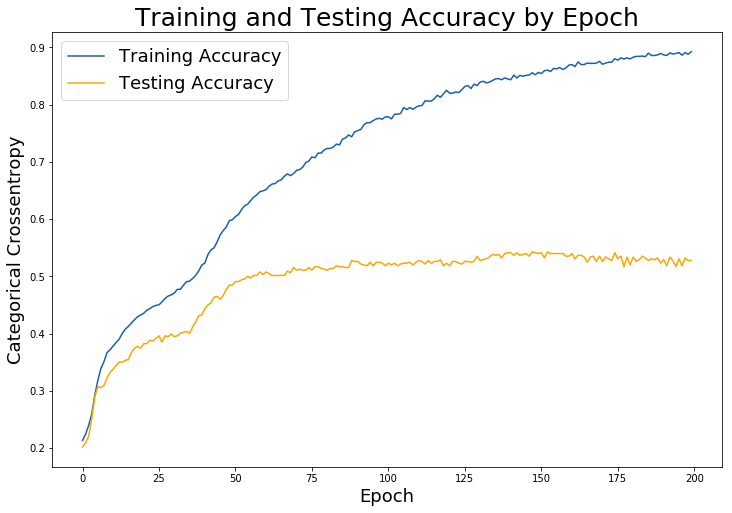

In [143]:
# Check out our train loss and test loss over epochs.
train_loss = model.history.history['acc']
test_loss = model.history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='#185fad')
plt.plot(test_loss, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [5]:
linguistic_index_2009 = pd.read_clipboard(names=['number','country','diversity_index_2009'])

In [6]:
linguistic_index_2017 = pd.read_clipboard(names=['number','country','diversity_index_2017'])

In [152]:
linguistic_index_2017['country'][127] = 'France'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
linguistic_index_2017['country'][127]

'France'

In [154]:
diversity_index = pd.merge(linguistic_index_2009, linguistic_index_2017, on='country')

In [155]:
diversity_index.drop(columns=['number_x','number_y'], inplace=True)

In [4]:
diversity_index.tail(10)

NameError: name 'diversity_index' is not defined

In [157]:
diversity_index = diversity_index.iloc[:197,:]

In [159]:
diversity_index.iloc[[127,129,139,166]]

,country,diversity_index_2009,diversity_index_2017
127,Macau,0.253,None
129,Montenegro,0.244,None
139,Hong Kong,0.205,None
166,Bermuda,0.076,None


In [160]:
diversity_index.drop(index=[127,129,139,166], inplace=True)

In [161]:
diversity_index.head()

,country,diversity_index_2009,diversity_index_2017
0,Papua New Guinea,0.988,.990
1,Cameroon,0.974,.942
2,Vanuatu,0.973,.972
3,Solomon Islands,0.968,.965
4,Central African Republic,0.959,.960


In [163]:
diversity_index[['diversity_index_2009','diversity_index_2017']] = diversity_index[['diversity_index_2009','diversity_index_2017']].astype(float)


In [164]:
diversity_index['percent_change'] = 100*(diversity_index['diversity_index_2017'] - diversity_index['diversity_index_2009'])/diversity_index['diversity_index_2009']


In [165]:
diversity_index.sort_values('percent_change').head()

,country,diversity_index_2009,diversity_index_2017,percent_change
145,Samoa,0.174,0.002,-98.850575
165,Rwanda,0.089,0.004,-95.505618
96,Marshall Islands,0.457,0.027,-94.091904
126,Malta,0.255,0.016,-93.725490
53,Tokelau,0.679,0.054,-92.047128


In [166]:
diversity_index.tail()

,country,diversity_index_2009,diversity_index_2017,percent_change
192,Iceland,0.007,0.019,171.428571
193,El Salvador,0.003,0.004,33.333333
194,Cuba,0.001,0.001,0.000000
195,Haiti,0.000,0.000,NaN
196,San Marino,0.000,0.494,inf


In [177]:
diversity_index.iloc[191,3] = 0

In [178]:
diversity_index.iloc[192,3] = 0

In [179]:
diversity_index.sort_values('percent_change').head()

,country,diversity_index_2009,diversity_index_2017,percent_change
145,Samoa,0.174,0.002,-98.850575
165,Rwanda,0.089,0.004,-95.505618
96,Marshall Islands,0.457,0.027,-94.091904
126,Malta,0.255,0.016,-93.725490
53,Tokelau,0.679,0.054,-92.047128


In [180]:
diversity_index.to_csv('../language_data/diversity_index_0917.csv')

In [108]:
wals_with_guardian.iloc[:,10:202].head()

,1A Consonant Inventories,2A Vowel Quality Inventories,3A Consonant-Vowel Ratio,4A Voicing in Plosives and Fricatives,5A Voicing and Gaps in Plosive Systems,6A Uvular Consonants,7A Glottalized Consonants,8A Lateral Consonants,9A The Velar Nasal,10A Vowel Nasalization,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
0,5,1,5,4,2,2,2,2,3,2,...,2,1,1,0,2,1,4,0,1,5
1,1,1,4,2,1,1,1,4,3,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,0,0,3,0,0,0,0,0,0,0


In [78]:
for columns in wals_with_guardian.columns[10:202]:
    wals_with_guardian[columns] = wals_with_guardian[columns].apply(lambda x: x[0] if type(x) == str else 0)

In [96]:
X = wals_with_guardian.iloc[:,10:202]
y = pd.get_dummies(wals_with_guardian.iloc[:,202])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [98]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [99]:
X_train_sc.shape

(990, 192)

In [104]:
model = Sequential()

model.add(Dense(32,
                activation='relu',
                input_shape=(192,),
               )
         )

model.add(Dense(16,
                activation='relu',
                input_shape=(192,),
               )
         )

model.add(Dense(5, #one neuron per class
                activation='softmax' #always use softmax for multiclass
               )
         ) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

model.fit(X_train_sc, y_train,
          epochs=1000,
          batch_size=512,
          validation_data=(X_test_sc, y_test)
         )

Train on 990 samples, validate on 331 samples
Epoch 1/1000
990/990 [==============================] - 0s 504us/step - loss: 1.8051 - acc: 0.2424 - val_loss: 1.7994 - val_acc: 0.2568
Epoch 2/1000
990/990 [==============================] - 0s 13us/step - loss: 1.7360 - acc: 0.2384 - val_loss: 1.7394 - val_acc: 0.2568
Epoch 3/1000
990/990 [==============================] - 0s 13us/step - loss: 1.6781 - acc: 0.2525 - val_loss: 1.6908 - val_acc: 0.2689
Epoch 4/1000
990/990 [==============================] - 0s 13us/step - loss: 1.6324 - acc: 0.2596 - val_loss: 1.6497 - val_acc: 0.2628
Epoch 5/1000
990/990 [==============================] - 0s 13us/step - loss: 1.5920 - acc: 0.2768 - val_loss: 1.6146 - val_acc: 0.2689
Epoch 6/1000
990/990 [==============================] - 0s 13us/step - loss: 1.5586 - acc: 0.2949 - val_loss: 1.5876 - val_acc: 0.2719
Epoch 7/1000
990/990 [==============================] - 0s 14us/step - loss: 1.5276 - acc: 0.3121 - val_loss: 1.5680 - val_acc: 0.2991
Epoch 8/

Epoch 61/1000
990/990 [==============================] - 0s 13us/step - loss: 1.0011 - acc: 0.6081 - val_loss: 1.6054 - val_acc: 0.3112
Epoch 62/1000
990/990 [==============================] - 0s 15us/step - loss: 0.9948 - acc: 0.6141 - val_loss: 1.6106 - val_acc: 0.3112
Epoch 63/1000
990/990 [==============================] - 0s 14us/step - loss: 0.9884 - acc: 0.6162 - val_loss: 1.6158 - val_acc: 0.3082
Epoch 64/1000
990/990 [==============================] - 0s 11us/step - loss: 0.9821 - acc: 0.6162 - val_loss: 1.6214 - val_acc: 0.3082
Epoch 65/1000
990/990 [==============================] - 0s 16us/step - loss: 0.9759 - acc: 0.6192 - val_loss: 1.6270 - val_acc: 0.3112
Epoch 66/1000
990/990 [==============================] - 0s 11us/step - loss: 0.9696 - acc: 0.6182 - val_loss: 1.6310 - val_acc: 0.3142
Epoch 67/1000
990/990 [==============================] - 0s 12us/step - loss: 0.9634 - acc: 0.6192 - val_loss: 1.6355 - val_acc: 0.3142
Epoch 68/1000
990/990 [=========================

990/990 [==============================] - 0s 10us/step - loss: 0.7119 - acc: 0.7152 - val_loss: 1.9411 - val_acc: 0.2931
Epoch 122/1000
990/990 [==============================] - 0s 12us/step - loss: 0.7079 - acc: 0.7172 - val_loss: 1.9484 - val_acc: 0.2991
Epoch 123/1000
990/990 [==============================] - 0s 14us/step - loss: 0.7046 - acc: 0.7212 - val_loss: 1.9568 - val_acc: 0.2991
Epoch 124/1000
990/990 [==============================] - 0s 13us/step - loss: 0.7016 - acc: 0.7192 - val_loss: 1.9651 - val_acc: 0.2900
Epoch 125/1000
990/990 [==============================] - 0s 11us/step - loss: 0.6983 - acc: 0.7212 - val_loss: 1.9712 - val_acc: 0.2931
Epoch 126/1000
990/990 [==============================] - 0s 12us/step - loss: 0.6955 - acc: 0.7222 - val_loss: 1.9740 - val_acc: 0.2900
Epoch 127/1000
990/990 [==============================] - 0s 13us/step - loss: 0.6923 - acc: 0.7273 - val_loss: 1.9809 - val_acc: 0.2931
Epoch 128/1000
990/990 [==============================] 

Epoch 181/1000
990/990 [==============================] - 0s 10us/step - loss: 0.5683 - acc: 0.7687 - val_loss: 2.3478 - val_acc: 0.3172
Epoch 182/1000
990/990 [==============================] - 0s 12us/step - loss: 0.5668 - acc: 0.7707 - val_loss: 2.3524 - val_acc: 0.3172
Epoch 183/1000
990/990 [==============================] - 0s 12us/step - loss: 0.5656 - acc: 0.7717 - val_loss: 2.3650 - val_acc: 0.3172
Epoch 184/1000
990/990 [==============================] - 0s 12us/step - loss: 0.5638 - acc: 0.7677 - val_loss: 2.3755 - val_acc: 0.3142
Epoch 185/1000
990/990 [==============================] - 0s 11us/step - loss: 0.5624 - acc: 0.7717 - val_loss: 2.3771 - val_acc: 0.3172
Epoch 186/1000
990/990 [==============================] - 0s 12us/step - loss: 0.5607 - acc: 0.7717 - val_loss: 2.3843 - val_acc: 0.3142
Epoch 187/1000
990/990 [==============================] - 0s 10us/step - loss: 0.5588 - acc: 0.7737 - val_loss: 2.3945 - val_acc: 0.3112
Epoch 188/1000
990/990 [=================

Epoch 241/1000
990/990 [==============================] - 0s 13us/step - loss: 0.4925 - acc: 0.7939 - val_loss: 2.7476 - val_acc: 0.3172
Epoch 242/1000
990/990 [==============================] - 0s 13us/step - loss: 0.4912 - acc: 0.7939 - val_loss: 2.7500 - val_acc: 0.3263
Epoch 243/1000
990/990 [==============================] - 0s 14us/step - loss: 0.4901 - acc: 0.7960 - val_loss: 2.7575 - val_acc: 0.3172
Epoch 244/1000
990/990 [==============================] - 0s 10us/step - loss: 0.4892 - acc: 0.7949 - val_loss: 2.7638 - val_acc: 0.3233
Epoch 245/1000
990/990 [==============================] - 0s 11us/step - loss: 0.4883 - acc: 0.7949 - val_loss: 2.7720 - val_acc: 0.3263
Epoch 246/1000
990/990 [==============================] - 0s 12us/step - loss: 0.4868 - acc: 0.7960 - val_loss: 2.7794 - val_acc: 0.3233
Epoch 247/1000
990/990 [==============================] - 0s 12us/step - loss: 0.4863 - acc: 0.7970 - val_loss: 2.7813 - val_acc: 0.3263
Epoch 248/1000
990/990 [=================

Epoch 301/1000
990/990 [==============================] - 0s 12us/step - loss: 0.4452 - acc: 0.8030 - val_loss: 3.0590 - val_acc: 0.3263
Epoch 302/1000
990/990 [==============================] - 0s 16us/step - loss: 0.4438 - acc: 0.8081 - val_loss: 3.0630 - val_acc: 0.3323
Epoch 303/1000
990/990 [==============================] - 0s 13us/step - loss: 0.4437 - acc: 0.8040 - val_loss: 3.0717 - val_acc: 0.3263
Epoch 304/1000
990/990 [==============================] - 0s 15us/step - loss: 0.4429 - acc: 0.8081 - val_loss: 3.0741 - val_acc: 0.3323
Epoch 305/1000
990/990 [==============================] - 0s 15us/step - loss: 0.4429 - acc: 0.8051 - val_loss: 3.0785 - val_acc: 0.3263
Epoch 306/1000
990/990 [==============================] - 0s 12us/step - loss: 0.4413 - acc: 0.8061 - val_loss: 3.0865 - val_acc: 0.3172
Epoch 307/1000
990/990 [==============================] - 0s 13us/step - loss: 0.4412 - acc: 0.8061 - val_loss: 3.0870 - val_acc: 0.3293
Epoch 308/1000
990/990 [=================

Epoch 361/1000
990/990 [==============================] - 0s 13us/step - loss: 0.4152 - acc: 0.8202 - val_loss: 3.3350 - val_acc: 0.3323
Epoch 362/1000
990/990 [==============================] - 0s 13us/step - loss: 0.4155 - acc: 0.8182 - val_loss: 3.3390 - val_acc: 0.3202
Epoch 363/1000
990/990 [==============================] - 0s 10us/step - loss: 0.4156 - acc: 0.8182 - val_loss: 3.3386 - val_acc: 0.3233
Epoch 364/1000
990/990 [==============================] - 0s 12us/step - loss: 0.4150 - acc: 0.8162 - val_loss: 3.3442 - val_acc: 0.3142
Epoch 365/1000
990/990 [==============================] - 0s 13us/step - loss: 0.4141 - acc: 0.8131 - val_loss: 3.3546 - val_acc: 0.3233
Epoch 366/1000
990/990 [==============================] - 0s 10us/step - loss: 0.4144 - acc: 0.8162 - val_loss: 3.3567 - val_acc: 0.3233
Epoch 367/1000
990/990 [==============================] - 0s 11us/step - loss: 0.4135 - acc: 0.8172 - val_loss: 3.3576 - val_acc: 0.3202
Epoch 368/1000
990/990 [=================

Epoch 421/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3973 - acc: 0.8182 - val_loss: 3.5514 - val_acc: 0.3233
Epoch 422/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3971 - acc: 0.8222 - val_loss: 3.5578 - val_acc: 0.3353
Epoch 423/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3950 - acc: 0.8222 - val_loss: 3.5683 - val_acc: 0.3233
Epoch 424/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3972 - acc: 0.8212 - val_loss: 3.5751 - val_acc: 0.3323
Epoch 425/1000
990/990 [==============================] - 0s 10us/step - loss: 0.3962 - acc: 0.8202 - val_loss: 3.5751 - val_acc: 0.3172
Epoch 426/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3979 - acc: 0.8212 - val_loss: 3.5811 - val_acc: 0.3202
Epoch 427/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3944 - acc: 0.8263 - val_loss: 3.5781 - val_acc: 0.3233
Epoch 428/1000
990/990 [=================

Epoch 540/1000
990/990 [==============================] - 0s 10us/step - loss: 0.3708 - acc: 0.8293 - val_loss: 3.9144 - val_acc: 0.3293
Epoch 541/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3714 - acc: 0.8313 - val_loss: 3.9193 - val_acc: 0.3353
Epoch 542/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3708 - acc: 0.8313 - val_loss: 3.9142 - val_acc: 0.3353
Epoch 543/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3700 - acc: 0.8283 - val_loss: 3.9180 - val_acc: 0.3384
Epoch 544/1000
990/990 [==============================] - 0s 15us/step - loss: 0.3707 - acc: 0.8303 - val_loss: 3.9286 - val_acc: 0.3293
Epoch 545/1000
990/990 [==============================] - 0s 16us/step - loss: 0.3700 - acc: 0.8313 - val_loss: 3.9377 - val_acc: 0.3353
Epoch 546/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3708 - acc: 0.8283 - val_loss: 3.9383 - val_acc: 0.3293
Epoch 547/1000
990/990 [=================

Epoch 600/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3620 - acc: 0.8323 - val_loss: 4.0762 - val_acc: 0.3353
Epoch 601/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3625 - acc: 0.8313 - val_loss: 4.0719 - val_acc: 0.3202
Epoch 602/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3632 - acc: 0.8354 - val_loss: 4.0686 - val_acc: 0.3414
Epoch 603/1000
990/990 [==============================] - 0s 10us/step - loss: 0.3609 - acc: 0.8343 - val_loss: 4.0798 - val_acc: 0.3293
Epoch 604/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3610 - acc: 0.8293 - val_loss: 4.0907 - val_acc: 0.3293
Epoch 605/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3620 - acc: 0.8354 - val_loss: 4.0864 - val_acc: 0.3293
Epoch 606/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3609 - acc: 0.8333 - val_loss: 4.0855 - val_acc: 0.3353
Epoch 607/1000
990/990 [=================

Epoch 660/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3562 - acc: 0.8354 - val_loss: 4.2210 - val_acc: 0.3323
Epoch 661/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3541 - acc: 0.8354 - val_loss: 4.2241 - val_acc: 0.3112
Epoch 662/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3553 - acc: 0.8374 - val_loss: 4.2282 - val_acc: 0.3263
Epoch 663/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3541 - acc: 0.8374 - val_loss: 4.2247 - val_acc: 0.3384
Epoch 664/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3557 - acc: 0.8323 - val_loss: 4.2243 - val_acc: 0.3414
Epoch 665/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3558 - acc: 0.8333 - val_loss: 4.2342 - val_acc: 0.3263
Epoch 666/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3540 - acc: 0.8343 - val_loss: 4.2354 - val_acc: 0.3293
Epoch 667/1000
990/990 [=================

Epoch 720/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3486 - acc: 0.8323 - val_loss: 4.3533 - val_acc: 0.3172
Epoch 721/1000
990/990 [==============================] - 0s 16us/step - loss: 0.3485 - acc: 0.8384 - val_loss: 4.3506 - val_acc: 0.3323
Epoch 722/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3478 - acc: 0.8323 - val_loss: 4.3518 - val_acc: 0.3353
Epoch 723/1000
990/990 [==============================] - 0s 16us/step - loss: 0.3479 - acc: 0.8313 - val_loss: 4.3523 - val_acc: 0.3323
Epoch 724/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3472 - acc: 0.8354 - val_loss: 4.3561 - val_acc: 0.3414
Epoch 725/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3480 - acc: 0.8313 - val_loss: 4.3639 - val_acc: 0.3202
Epoch 726/1000
990/990 [==============================] - 0s 10us/step - loss: 0.3471 - acc: 0.8343 - val_loss: 4.3623 - val_acc: 0.3414
Epoch 727/1000
990/990 [=================

Epoch 780/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3430 - acc: 0.8333 - val_loss: 4.4688 - val_acc: 0.3384
Epoch 781/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3432 - acc: 0.8343 - val_loss: 4.4706 - val_acc: 0.3323
Epoch 782/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3427 - acc: 0.8343 - val_loss: 4.4795 - val_acc: 0.3263
Epoch 783/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3427 - acc: 0.8364 - val_loss: 4.4763 - val_acc: 0.3293
Epoch 784/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3471 - acc: 0.8313 - val_loss: 4.4774 - val_acc: 0.3384
Epoch 785/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3469 - acc: 0.8354 - val_loss: 4.4874 - val_acc: 0.3233
Epoch 786/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3454 - acc: 0.8384 - val_loss: 4.4857 - val_acc: 0.3353
Epoch 787/1000
990/990 [=================

Epoch 840/1000
990/990 [==============================] - 0s 15us/step - loss: 0.3383 - acc: 0.8343 - val_loss: 4.5828 - val_acc: 0.3263
Epoch 841/1000
990/990 [==============================] - 0s 15us/step - loss: 0.3379 - acc: 0.8394 - val_loss: 4.5890 - val_acc: 0.3293
Epoch 842/1000
990/990 [==============================] - 0s 15us/step - loss: 0.3387 - acc: 0.8404 - val_loss: 4.5879 - val_acc: 0.3323
Epoch 843/1000
990/990 [==============================] - 0s 13us/step - loss: 0.3385 - acc: 0.8343 - val_loss: 4.5863 - val_acc: 0.3263
Epoch 844/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3376 - acc: 0.8364 - val_loss: 4.5917 - val_acc: 0.3233
Epoch 845/1000
990/990 [==============================] - 0s 11us/step - loss: 0.3370 - acc: 0.8394 - val_loss: 4.5937 - val_acc: 0.3263
Epoch 846/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3372 - acc: 0.8354 - val_loss: 4.5900 - val_acc: 0.3353
Epoch 847/1000
990/990 [=================

Epoch 900/1000
990/990 [==============================] - 0s 17us/step - loss: 0.3328 - acc: 0.8424 - val_loss: 4.6818 - val_acc: 0.3414
Epoch 901/1000
990/990 [==============================] - 0s 16us/step - loss: 0.3337 - acc: 0.8414 - val_loss: 4.6871 - val_acc: 0.3353
Epoch 902/1000
990/990 [==============================] - 0s 15us/step - loss: 0.3350 - acc: 0.8394 - val_loss: 4.6888 - val_acc: 0.3263
Epoch 903/1000
990/990 [==============================] - 0s 17us/step - loss: 0.3353 - acc: 0.8404 - val_loss: 4.6805 - val_acc: 0.3474
Epoch 904/1000
990/990 [==============================] - 0s 19us/step - loss: 0.3333 - acc: 0.8354 - val_loss: 4.6856 - val_acc: 0.3414
Epoch 905/1000
990/990 [==============================] - 0s 18us/step - loss: 0.3344 - acc: 0.8364 - val_loss: 4.6898 - val_acc: 0.3414
Epoch 906/1000
990/990 [==============================] - 0s 20us/step - loss: 0.3334 - acc: 0.8434 - val_loss: 4.7024 - val_acc: 0.3323
Epoch 907/1000
990/990 [=================

Epoch 960/1000
990/990 [==============================] - 0s 16us/step - loss: 0.3313 - acc: 0.8384 - val_loss: 4.7747 - val_acc: 0.3474
Epoch 961/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3306 - acc: 0.8303 - val_loss: 4.7785 - val_acc: 0.3444
Epoch 962/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3299 - acc: 0.8343 - val_loss: 4.7888 - val_acc: 0.3323
Epoch 963/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3322 - acc: 0.8374 - val_loss: 4.7876 - val_acc: 0.3263
Epoch 964/1000
990/990 [==============================] - 0s 12us/step - loss: 0.3312 - acc: 0.8354 - val_loss: 4.7826 - val_acc: 0.3505
Epoch 965/1000
990/990 [==============================] - 0s 16us/step - loss: 0.3325 - acc: 0.8374 - val_loss: 4.7857 - val_acc: 0.3384
Epoch 966/1000
990/990 [==============================] - 0s 14us/step - loss: 0.3301 - acc: 0.8354 - val_loss: 4.7920 - val_acc: 0.3323
Epoch 967/1000
990/990 [=================

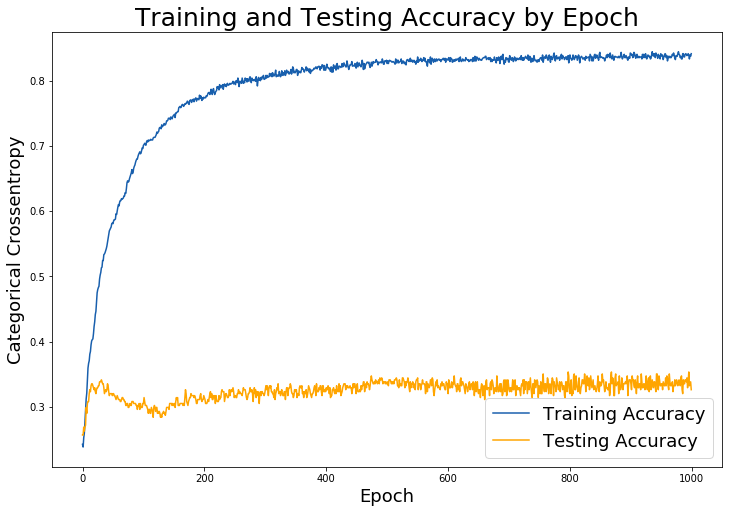

In [105]:
# Check out our train loss and test loss over epochs.
train_loss = model.history.history['acc']
test_loss = model.history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='#185fad')
plt.plot(test_loss, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);